## Mini-Projeto 3 - Guia de Modelagem Preditiva com Linguagem Python e TensorFlow

![title](imagens/mini-projeto3.png)

Neste Mini-Projeto vamos apresentar um guia básico de modelagem preditiva usando Linguagem Python e TensorFlow, o principal framework para construção de modelos de Machine Learning e Deep Learning e para construir aplicações comerciais de Inteligência Artificial.

Este é um guia básico pois o TensorFlow é um framework extenso. O TensorFlow é abordado em detalhes nos cursos da <a href="https://www.datascienceacademy.com.br/bundle/formacao-inteligencia-artificial">Formação Inteligência Artificial</a> (especialmente no curso Deep Learning Frameworks) e na <a href="https://www.datascienceacademy.com.br/bundle/formacao-inteligencia-artificial-aplicada-a-medicina">Formação IA Aplicada à Medicina</a>.

Na <a href="https://www.datascienceacademy.com.br/bundle/formacao-cientista-de-dados">Formação Cientista de Dados</a>, no curso de Machine Learning também há um módulo sobre TensorFlow. Alguns projetos com TensorFlow podem ser encontrados no curso de IA Aplicada a Finanças da <a href="https://www.datascienceacademy.com.br/bundle/formacao-engenheiro-blockchain">Formação Engenheiro Blockchain</a>.

## Instalando e Carregando Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.8


In [2]:
# Instala o TensorFlow
!pip install -q tensorflow==2.5

In [3]:
# Instala o Pydot
!pip install -q pydot

In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.5.0


## Carregando os Dados

### Boston House Prices Dataset

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

#### Características:

* Número de Observções: 506
* Os primeiros 13 recursos são recursos preditivos numéricos / categóricos. 
* O último (atributo 14): o valor mediano é a variável de destino.

In [6]:
# Download dos dados
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

In [7]:
# Nomes das colunas
nomes_colunas = ['CRIM',
                 'ZN',
                 'INDUS',
                 'CHAS',
                 'NOX',
                 'RM', 
                 'AGE', 
                 'DIS',
                 'RAD',
                 'TAX',
                 'PTRATION', 
                 'B', 
                 'LSTAT', 
                 'MEDV']

In [8]:
# Carrega os dados
dataset = pd.read_csv(dataset_path, 
                      names = nomes_colunas,
                      na_values = "?", 
                      comment = '\t',
                      sep = " ", 
                      skipinitialspace = True)

In [9]:
# Shape
dataset.shape

(506, 14)

In [10]:
# Visualiza os dados
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Vamos dividir os dados em treino e teste com proporção 80/20.

In [11]:
# Split dos dados
dados_treino = dataset.sample(frac = 0.8, random_state = 0)
dados_teste = dataset.drop(dados_treino.index)

## Modelagem Preditiva - Regressão Linear Simples

Na regressão linear simples desejamos modelar a relação entre a variável dependente (y) e uma variável independente (x).

* Variável independente: 'RM'
* Variável dependente: 'MEDV'

Queremos prever o valor da mediana das casas ocupadas por proprietários com base no número de quartos.

Vamos criar um plot mostrando a relação atual entre as variáveis.

Basicamente temos $MEDV=f(RM)$ e queremos estimar a função $f()$ usando regressão linear.

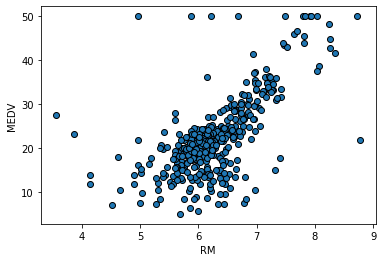

In [12]:
# Representação visual dos dados de treino
fig, ax = plt.subplots()
x = dados_treino['RM']
y = dados_treino['MEDV']
ax.scatter(x, y, edgecolors = (0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

Vamos separar x e y.

In [13]:
# Divisão
x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']
x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']

## Criação do Modelo

Queremos encontrar os parâmetros (**W**) que permitem prever a saída y a partir da entrada x:

$y = w_1 x + w_0$

A fórmula acima pode ser definida com a seguinte camada densa em um modelo de rede neural artificial:

*layers.Dense(1, use_bias=True, input_shape=(1,))*

In [14]:
# Função para construir o modelo
def modelo_linear():
    
    # Cria o modelo
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name = 'layer')])

    # Otimizador
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01, 
                                         beta_1 = 0.9, 
                                         beta_2 = 0.99, 
                                         epsilon = 1e-05, 
                                         amsgrad = False, 
                                         name = 'Adam')
    
    # Compila o modelo
    model.compile(loss = 'mse', 
                  optimizer = optimizer, 
                  metrics = ['mae','mse'])

    return model

MAE = Mean Absolute Error

MSE = Mean Squared Error

In [15]:
# Cria o modelo 
modelo = modelo_linear()

In [16]:
!pip  install graphviz

In [17]:
# Plot do modelo
tf.keras.utils.plot_model(modelo, 
                          to_file = 'imagens/modelo.png', 
                          show_shapes = True, 
                          show_layer_names = True,
                          rankdir = 'TB', 
                          expand_nested = False, 
                          dpi = 100)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


### Treinamento do Modelo

In [18]:
# Hiperparâmetros
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print('Checkpoint salvo a cada {} amostras'.format(n_samples_save))

Checkpoint salvo a cada 81000 amostras


In [19]:
# Callback
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                                 patience = n_idle_epochs, 
                                                 min_delta = 0.001)

In [20]:
# Lista para as previsões
predictions_list = []

In [21]:
# Caminho ppara salvar o checkpoint
checkpoint_path = "dados/"

In [22]:
# Create a callback that saves the model's weights every n_samples_save
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = "dados/", 
                                                        verbose = 1, 
                                                        save_weights_only = True,
                                                        save_freq = n_samples_save)

In [23]:
# Salva a primeira versão do modelo
modelo.save_weights(checkpoint_path.format(epoch = 0))

In [24]:
# Treinamento
history = modelo.fit(x_treino, 
                     y_treino, 
                     batch_size = batch_size,
                     epochs = n_epochs, 
                     validation_split = 0.1, 
                     verbose = 1, 
                     callbacks = [earlyStopping, checkpointCallback])

Epoch 1/4000
2/2 [==============================] - 2s 173ms/step - loss: 995.0989 - mae: 30.1263 - mse: 995.0989 - val_loss: 1103.4937 - val_mae: 31.4290 - val_mse: 1103.4937
Epoch 2/4000
2/2 [==============================] - 0s 21ms/step - loss: 986.1769 - mae: 29.9812 - mse: 986.1769 - val_loss: 1094.2136 - val_mae: 31.2834 - val_mse: 1094.2136
Epoch 3/4000
2/2 [==============================] - 0s 24ms/step - loss: 977.3157 - mae: 29.8360 - mse: 977.3157 - val_loss: 1084.9775 - val_mae: 31.1379 - val_mse: 1084.9775
Epoch 4/4000
2/2 [==============================] - 0s 26ms/step - loss: 968.4409 - mae: 29.6910 - mse: 968.4409 - val_loss: 1075.7837 - val_mae: 30.9923 - val_mse: 1075.7837
Epoch 5/4000
2/2 [==============================] - 0s 23ms/step - loss: 959.7053 - mae: 29.5461 - mse: 959.7053 - val_loss: 1066.6306 - val_mae: 30.8467 - val_mse: 1066.6306
Epoch 6/4000
2/2 [==============================] - 0s 21ms/step - loss: 950.9048 - mae: 29.4010 - mse: 950.9048 - val_loss:

Epoch 48/4000
2/2 [==============================] - 0s 21ms/step - loss: 632.7256 - mae: 23.5258 - mse: 632.7256 - val_loss: 724.9310 - val_mae: 24.8127 - val_mse: 724.9310
Epoch 49/4000
2/2 [==============================] - 0s 22ms/step - loss: 626.3185 - mae: 23.3927 - mse: 626.3185 - val_loss: 718.2006 - val_mae: 24.6792 - val_mse: 718.2006
Epoch 50/4000
2/2 [==============================] - 0s 25ms/step - loss: 620.0035 - mae: 23.2599 - mse: 620.0035 - val_loss: 711.5291 - val_mae: 24.5462 - val_mse: 711.5291
Epoch 51/4000
2/2 [==============================] - 0s 24ms/step - loss: 613.6218 - mae: 23.1271 - mse: 613.6218 - val_loss: 704.9209 - val_mae: 24.4137 - val_mse: 704.9209
Epoch 52/4000
2/2 [==============================] - 0s 27ms/step - loss: 607.3220 - mae: 22.9951 - mse: 607.3220 - val_loss: 698.3459 - val_mae: 24.2812 - val_mse: 698.3459
Epoch 53/4000
2/2 [==============================] - 0s 24ms/step - loss: 601.2113 - mae: 22.8633 - mse: 601.2113 - val_loss: 691.

2/2 [==============================] - 0s 24ms/step - loss: 380.9824 - mae: 17.5627 - mse: 380.9824 - val_loss: 458.8690 - val_mae: 18.8371 - val_mse: 458.8690
Epoch 96/4000
2/2 [==============================] - 0s 22ms/step - loss: 376.6154 - mae: 17.4427 - mse: 376.6154 - val_loss: 454.2599 - val_mae: 18.7170 - val_mse: 454.2599
Epoch 97/4000
2/2 [==============================] - 0s 20ms/step - loss: 372.3488 - mae: 17.3230 - mse: 372.3488 - val_loss: 449.6867 - val_mae: 18.5971 - val_mse: 449.6867
Epoch 98/4000
2/2 [==============================] - 0s 24ms/step - loss: 368.0935 - mae: 17.2038 - mse: 368.0935 - val_loss: 445.1552 - val_mae: 18.4775 - val_mse: 445.1552
Epoch 99/4000
2/2 [==============================] - 0s 23ms/step - loss: 363.8851 - mae: 17.0846 - mse: 363.8851 - val_loss: 440.6629 - val_mae: 18.3582 - val_mse: 440.6629
Epoch 100/4000
2/2 [==============================] - 0s 22ms/step - loss: 359.7166 - mae: 16.9664 - mse: 359.7166 - val_loss: 436.2103 - val_ma

Epoch 142/4000
2/2 [==============================] - 0s 24ms/step - loss: 216.7265 - mae: 12.4028 - mse: 216.7265 - val_loss: 282.0800 - val_mae: 13.7013 - val_mse: 282.0800
Epoch 143/4000
2/2 [==============================] - 0s 24ms/step - loss: 214.0627 - mae: 12.3049 - mse: 214.0627 - val_loss: 279.1491 - val_mae: 13.6052 - val_mse: 279.1491
Epoch 144/4000
2/2 [==============================] - 0s 25ms/step - loss: 211.3995 - mae: 12.2081 - mse: 211.3995 - val_loss: 276.2561 - val_mae: 13.5096 - val_mse: 276.2561
Epoch 145/4000
2/2 [==============================] - 0s 24ms/step - loss: 208.7598 - mae: 12.1134 - mse: 208.7598 - val_loss: 273.3942 - val_mae: 13.4143 - val_mse: 273.3942
Epoch 146/4000
2/2 [==============================] - 0s 25ms/step - loss: 206.1590 - mae: 12.0171 - mse: 206.1590 - val_loss: 270.5548 - val_mae: 13.3225 - val_mse: 270.5548
Epoch 147/4000
2/2 [==============================] - 0s 25ms/step - loss: 203.6285 - mae: 11.9228 - mse: 203.6285 - val_loss

Epoch 189/4000
2/2 [==============================] - 0s 24ms/step - loss: 120.2272 - mae: 8.4994 - mse: 120.2272 - val_loss: 174.8104 - val_mae: 9.9624 - val_mse: 174.8104
Epoch 190/4000
2/2 [==============================] - 0s 25ms/step - loss: 118.7964 - mae: 8.4362 - mse: 118.7964 - val_loss: 173.1532 - val_mae: 9.8980 - val_mse: 173.1532
Epoch 191/4000
2/2 [==============================] - 0s 24ms/step - loss: 117.3408 - mae: 8.3728 - mse: 117.3408 - val_loss: 171.5197 - val_mae: 9.8338 - val_mse: 171.5197
Epoch 192/4000
2/2 [==============================] - 0s 25ms/step - loss: 115.9653 - mae: 8.3116 - mse: 115.9653 - val_loss: 169.9021 - val_mae: 9.7696 - val_mse: 169.9021
Epoch 193/4000
2/2 [==============================] - 0s 24ms/step - loss: 114.5854 - mae: 8.2509 - mse: 114.5854 - val_loss: 168.3119 - val_mae: 9.7058 - val_mse: 168.3119
Epoch 194/4000
2/2 [==============================] - 0s 26ms/step - loss: 113.2288 - mae: 8.1910 - mse: 113.2288 - val_loss: 166.7508 

Epoch 237/4000
2/2 [==============================] - 0s 24ms/step - loss: 73.4433 - mae: 6.2115 - mse: 73.4433 - val_loss: 119.2233 - val_mae: 7.7850 - val_mse: 119.2233
Epoch 238/4000
2/2 [==============================] - 0s 28ms/step - loss: 72.8911 - mae: 6.1815 - mse: 72.8911 - val_loss: 118.5039 - val_mae: 7.7547 - val_mse: 118.5039
Epoch 239/4000
2/2 [==============================] - 0s 26ms/step - loss: 72.3245 - mae: 6.1492 - mse: 72.3245 - val_loss: 117.8059 - val_mae: 7.7271 - val_mse: 117.8059
Epoch 240/4000
2/2 [==============================] - 0s 25ms/step - loss: 71.8063 - mae: 6.1191 - mse: 71.8063 - val_loss: 117.1225 - val_mae: 7.7009 - val_mse: 117.1225
Epoch 241/4000
2/2 [==============================] - 0s 24ms/step - loss: 71.2703 - mae: 6.0887 - mse: 71.2703 - val_loss: 116.4570 - val_mae: 7.6751 - val_mse: 116.4570
Epoch 242/4000
2/2 [==============================] - 0s 30ms/step - loss: 70.7705 - mae: 6.0593 - mse: 70.7705 - val_loss: 115.8018 - val_mae: 7

Epoch 285/4000
2/2 [==============================] - 0s 25ms/step - loss: 58.5088 - mae: 5.3570 - mse: 58.5088 - val_loss: 98.2888 - val_mae: 6.9673 - val_mse: 98.2888
Epoch 286/4000
2/2 [==============================] - 0s 23ms/step - loss: 58.3874 - mae: 5.3514 - mse: 58.3874 - val_loss: 98.0788 - val_mae: 6.9609 - val_mse: 98.0788
Epoch 287/4000
2/2 [==============================] - 0s 25ms/step - loss: 58.2682 - mae: 5.3470 - mse: 58.2682 - val_loss: 97.8722 - val_mae: 6.9546 - val_mse: 97.8722
Epoch 288/4000
2/2 [==============================] - 0s 23ms/step - loss: 58.1562 - mae: 5.3420 - mse: 58.1562 - val_loss: 97.6670 - val_mae: 6.9481 - val_mse: 97.6670
Epoch 289/4000
2/2 [==============================] - 0s 20ms/step - loss: 58.0469 - mae: 5.3382 - mse: 58.0469 - val_loss: 97.4635 - val_mae: 6.9416 - val_mse: 97.4635
Epoch 290/4000
2/2 [==============================] - 0s 24ms/step - loss: 57.9472 - mae: 5.3350 - mse: 57.9472 - val_loss: 97.2634 - val_mae: 6.9352 - val

2/2 [==============================] - 0s 23ms/step - loss: 56.2890 - mae: 5.3414 - mse: 56.2890 - val_loss: 93.2945 - val_mae: 6.8581 - val_mse: 93.2945
Epoch 334/4000
2/2 [==============================] - 0s 22ms/step - loss: 56.2874 - mae: 5.3428 - mse: 56.2874 - val_loss: 93.2541 - val_mae: 6.8578 - val_mse: 93.2541
Epoch 335/4000
2/2 [==============================] - 0s 24ms/step - loss: 56.2781 - mae: 5.3442 - mse: 56.2781 - val_loss: 93.2206 - val_mae: 6.8575 - val_mse: 93.2206
Epoch 336/4000
2/2 [==============================] - 0s 24ms/step - loss: 56.2726 - mae: 5.3454 - mse: 56.2726 - val_loss: 93.1928 - val_mae: 6.8573 - val_mse: 93.1928
Epoch 337/4000
2/2 [==============================] - 0s 26ms/step - loss: 56.2634 - mae: 5.3462 - mse: 56.2634 - val_loss: 93.1715 - val_mae: 6.8571 - val_mse: 93.1715
Epoch 338/4000
2/2 [==============================] - 0s 25ms/step - loss: 56.2565 - mae: 5.3467 - mse: 56.2565 - val_loss: 93.1499 - val_mae: 6.8569 - val_mse: 93.1499
E

2/2 [==============================] - 0s 25ms/step - loss: 56.1126 - mae: 5.3678 - mse: 56.1126 - val_loss: 92.5509 - val_mae: 6.8487 - val_mse: 92.5509
Epoch 382/4000
2/2 [==============================] - 0s 24ms/step - loss: 56.1097 - mae: 5.3685 - mse: 56.1097 - val_loss: 92.5358 - val_mae: 6.8484 - val_mse: 92.5358
Epoch 383/4000
2/2 [==============================] - 0s 23ms/step - loss: 56.1081 - mae: 5.3693 - mse: 56.1081 - val_loss: 92.5223 - val_mae: 6.8482 - val_mse: 92.5223
Epoch 384/4000
2/2 [==============================] - 0s 22ms/step - loss: 56.1044 - mae: 5.3698 - mse: 56.1044 - val_loss: 92.5144 - val_mae: 6.8480 - val_mse: 92.5144
Epoch 385/4000
2/2 [==============================] - 0s 24ms/step - loss: 56.1016 - mae: 5.3700 - mse: 56.1016 - val_loss: 92.5071 - val_mae: 6.8478 - val_mse: 92.5071
Epoch 386/4000
2/2 [==============================] - 0s 24ms/step - loss: 56.0999 - mae: 5.3705 - mse: 56.0999 - val_loss: 92.4948 - val_mae: 6.8476 - val_mse: 92.4948
E

2/2 [==============================] - 0s 22ms/step - loss: 55.9472 - mae: 5.3634 - mse: 55.9472 - val_loss: 92.3885 - val_mae: 6.8395 - val_mse: 92.3885
Epoch 430/4000
2/2 [==============================] - 0s 21ms/step - loss: 55.9433 - mae: 5.3617 - mse: 55.9433 - val_loss: 92.4065 - val_mae: 6.8394 - val_mse: 92.4065
Epoch 431/4000
2/2 [==============================] - 0s 22ms/step - loss: 55.9402 - mae: 5.3600 - mse: 55.9402 - val_loss: 92.4210 - val_mae: 6.8393 - val_mse: 92.4210
Epoch 432/4000
2/2 [==============================] - 0s 32ms/step - loss: 55.9350 - mae: 5.3587 - mse: 55.9350 - val_loss: 92.4294 - val_mae: 6.8391 - val_mse: 92.4294
Epoch 433/4000
2/2 [==============================] - 0s 29ms/step - loss: 55.9309 - mae: 5.3576 - mse: 55.9309 - val_loss: 92.4391 - val_mae: 6.8389 - val_mse: 92.4391
Epoch 434/4000
2/2 [==============================] - 0s 28ms/step - loss: 55.9273 - mae: 5.3565 - mse: 55.9273 - val_loss: 92.4473 - val_mae: 6.8388 - val_mse: 92.4473
E

2/2 [==============================] - 0s 22ms/step - loss: 55.7060 - mae: 5.3422 - mse: 55.7060 - val_loss: 92.2907 - val_mae: 6.8267 - val_mse: 92.2907
Epoch 478/4000
2/2 [==============================] - 0s 22ms/step - loss: 55.6973 - mae: 5.3429 - mse: 55.6973 - val_loss: 92.2518 - val_mae: 6.8262 - val_mse: 92.2518
Epoch 479/4000
2/2 [==============================] - 0s 23ms/step - loss: 55.6925 - mae: 5.3453 - mse: 55.6925 - val_loss: 92.2008 - val_mae: 6.8256 - val_mse: 92.2008
Epoch 480/4000
2/2 [==============================] - 0s 21ms/step - loss: 55.6838 - mae: 5.3477 - mse: 55.6838 - val_loss: 92.1559 - val_mae: 6.8250 - val_mse: 92.1559
Epoch 481/4000
2/2 [==============================] - 0s 22ms/step - loss: 55.6816 - mae: 5.3507 - mse: 55.6816 - val_loss: 92.1092 - val_mae: 6.8243 - val_mse: 92.1092
Epoch 482/4000
2/2 [==============================] - 0s 26ms/step - loss: 55.6749 - mae: 5.3532 - mse: 55.6749 - val_loss: 92.0732 - val_mae: 6.8238 - val_mse: 92.0732
E

2/2 [==============================] - 0s 23ms/step - loss: 55.3791 - mae: 5.3429 - mse: 55.3791 - val_loss: 91.8089 - val_mae: 6.8068 - val_mse: 91.8089
Epoch 526/4000
2/2 [==============================] - 0s 30ms/step - loss: 55.3738 - mae: 5.3404 - mse: 55.3738 - val_loss: 91.8398 - val_mae: 6.8067 - val_mse: 91.8398
Epoch 527/4000
2/2 [==============================] - 0s 23ms/step - loss: 55.3593 - mae: 5.3374 - mse: 55.3593 - val_loss: 91.8555 - val_mae: 6.8064 - val_mse: 91.8555
Epoch 528/4000
2/2 [==============================] - 0s 22ms/step - loss: 55.3521 - mae: 5.3352 - mse: 55.3521 - val_loss: 91.8740 - val_mae: 6.8061 - val_mse: 91.8740
Epoch 529/4000
2/2 [==============================] - 0s 22ms/step - loss: 55.3418 - mae: 5.3332 - mse: 55.3418 - val_loss: 91.8843 - val_mae: 6.8058 - val_mse: 91.8843
Epoch 530/4000
2/2 [==============================] - 0s 21ms/step - loss: 55.3339 - mae: 5.3316 - mse: 55.3339 - val_loss: 91.8911 - val_mae: 6.8054 - val_mse: 91.8911
E

2/2 [==============================] - 0s 24ms/step - loss: 54.9660 - mae: 5.3064 - mse: 54.9660 - val_loss: 91.6797 - val_mae: 6.7851 - val_mse: 91.6797
Epoch 574/4000
2/2 [==============================] - 0s 24ms/step - loss: 54.9516 - mae: 5.3060 - mse: 54.9516 - val_loss: 91.6478 - val_mae: 6.7844 - val_mse: 91.6478
Epoch 575/4000
2/2 [==============================] - 0s 23ms/step - loss: 54.9424 - mae: 5.3068 - mse: 54.9424 - val_loss: 91.6211 - val_mae: 6.7838 - val_mse: 91.6211
Epoch 576/4000
2/2 [==============================] - 0s 22ms/step - loss: 54.9366 - mae: 5.3081 - mse: 54.9366 - val_loss: 91.5814 - val_mae: 6.7830 - val_mse: 91.5814
Epoch 577/4000
2/2 [==============================] - 0s 21ms/step - loss: 54.9244 - mae: 5.3094 - mse: 54.9244 - val_loss: 91.5614 - val_mae: 6.7824 - val_mse: 91.5614
Epoch 578/4000
2/2 [==============================] - 0s 30ms/step - loss: 54.9157 - mae: 5.3099 - mse: 54.9157 - val_loss: 91.5352 - val_mae: 6.7818 - val_mse: 91.5352
E

2/2 [==============================] - 0s 22ms/step - loss: 54.5153 - mae: 5.2756 - mse: 54.5153 - val_loss: 91.4961 - val_mae: 6.7610 - val_mse: 91.4961
Epoch 622/4000
2/2 [==============================] - 0s 27ms/step - loss: 54.5078 - mae: 5.2720 - mse: 54.5078 - val_loss: 91.5482 - val_mae: 6.7609 - val_mse: 91.5482
Epoch 623/4000
2/2 [==============================] - 0s 23ms/step - loss: 54.5099 - mae: 5.2680 - mse: 54.5099 - val_loss: 91.5941 - val_mae: 6.7607 - val_mse: 91.5941
Epoch 624/4000
2/2 [==============================] - 0s 26ms/step - loss: 54.5132 - mae: 5.2654 - mse: 54.5132 - val_loss: 91.5864 - val_mae: 6.7601 - val_mse: 91.5864
Epoch 625/4000
2/2 [==============================] - 0s 23ms/step - loss: 54.4859 - mae: 5.2654 - mse: 54.4859 - val_loss: 91.5091 - val_mae: 6.7591 - val_mse: 91.5091
Epoch 626/4000
2/2 [==============================] - 0s 20ms/step - loss: 54.4753 - mae: 5.2688 - mse: 54.4753 - val_loss: 91.4326 - val_mae: 6.7581 - val_mse: 91.4326
E

2/2 [==============================] - 0s 22ms/step - loss: 54.0753 - mae: 5.2573 - mse: 54.0753 - val_loss: 91.0380 - val_mae: 6.7348 - val_mse: 91.0380
Epoch 670/4000
2/2 [==============================] - 0s 22ms/step - loss: 54.0666 - mae: 5.2552 - mse: 54.0666 - val_loss: 91.0623 - val_mae: 6.7344 - val_mse: 91.0623
Epoch 671/4000
2/2 [==============================] - 0s 23ms/step - loss: 54.0571 - mae: 5.2530 - mse: 54.0571 - val_loss: 91.0708 - val_mae: 6.7340 - val_mse: 91.0708
Epoch 672/4000
2/2 [==============================] - 0s 23ms/step - loss: 54.0484 - mae: 5.2516 - mse: 54.0484 - val_loss: 91.0636 - val_mae: 6.7335 - val_mse: 91.0636
Epoch 673/4000
2/2 [==============================] - 0s 24ms/step - loss: 54.0414 - mae: 5.2518 - mse: 54.0414 - val_loss: 91.0460 - val_mae: 6.7329 - val_mse: 91.0460
Epoch 674/4000
2/2 [==============================] - 0s 24ms/step - loss: 54.0330 - mae: 5.2511 - mse: 54.0330 - val_loss: 91.0458 - val_mae: 6.7324 - val_mse: 91.0458
E

2/2 [==============================] - 0s 26ms/step - loss: 53.6179 - mae: 5.2234 - mse: 53.6179 - val_loss: 90.7840 - val_mae: 6.7087 - val_mse: 90.7840
Epoch 718/4000
2/2 [==============================] - 0s 23ms/step - loss: 53.6076 - mae: 5.2252 - mse: 53.6076 - val_loss: 90.7268 - val_mae: 6.7077 - val_mse: 90.7268
Epoch 719/4000
2/2 [==============================] - 0s 21ms/step - loss: 53.5989 - mae: 5.2280 - mse: 53.5989 - val_loss: 90.6754 - val_mae: 6.7069 - val_mse: 90.6754
Epoch 720/4000
2/2 [==============================] - 0s 26ms/step - loss: 53.5878 - mae: 5.2300 - mse: 53.5878 - val_loss: 90.6362 - val_mae: 6.7060 - val_mse: 90.6362
Epoch 721/4000
2/2 [==============================] - 0s 32ms/step - loss: 53.5794 - mae: 5.2315 - mse: 53.5794 - val_loss: 90.5995 - val_mae: 6.7052 - val_mse: 90.5995
Epoch 722/4000
2/2 [==============================] - 0s 21ms/step - loss: 53.5706 - mae: 5.2330 - mse: 53.5706 - val_loss: 90.5698 - val_mae: 6.7045 - val_mse: 90.5698
E

2/2 [==============================] - 0s 20ms/step - loss: 53.1690 - mae: 5.2011 - mse: 53.1690 - val_loss: 90.4083 - val_mae: 6.6811 - val_mse: 90.4083
Epoch 766/4000
2/2 [==============================] - 0s 21ms/step - loss: 53.1504 - mae: 5.2024 - mse: 53.1504 - val_loss: 90.3372 - val_mae: 6.6801 - val_mse: 90.3372
Epoch 767/4000
2/2 [==============================] - 0s 21ms/step - loss: 53.1392 - mae: 5.2054 - mse: 53.1392 - val_loss: 90.2796 - val_mae: 6.6792 - val_mse: 90.2796
Epoch 768/4000
2/2 [==============================] - 0s 25ms/step - loss: 53.1392 - mae: 5.2097 - mse: 53.1392 - val_loss: 90.2102 - val_mae: 6.6782 - val_mse: 90.2102
Epoch 769/4000
2/2 [==============================] - 0s 26ms/step - loss: 53.1305 - mae: 5.2130 - mse: 53.1305 - val_loss: 90.1718 - val_mae: 6.6775 - val_mse: 90.1718
Epoch 770/4000
2/2 [==============================] - 0s 25ms/step - loss: 53.1248 - mae: 5.2145 - mse: 53.1248 - val_loss: 90.1513 - val_mae: 6.6768 - val_mse: 90.1513
E

2/2 [==============================] - 0s 25ms/step - loss: 52.7456 - mae: 5.1885 - mse: 52.7456 - val_loss: 89.9534 - val_mae: 6.6547 - val_mse: 89.9534
Epoch 814/4000
2/2 [==============================] - 0s 21ms/step - loss: 52.7385 - mae: 5.1880 - mse: 52.7385 - val_loss: 89.9515 - val_mae: 6.6542 - val_mse: 89.9515
Epoch 815/4000
2/2 [==============================] - 0s 22ms/step - loss: 52.7348 - mae: 5.1874 - mse: 52.7348 - val_loss: 89.9338 - val_mae: 6.6536 - val_mse: 89.9338
Epoch 816/4000
2/2 [==============================] - 0s 20ms/step - loss: 52.7193 - mae: 5.1878 - mse: 52.7193 - val_loss: 89.8851 - val_mae: 6.6528 - val_mse: 89.8851
Epoch 817/4000
2/2 [==============================] - 0s 20ms/step - loss: 52.7171 - mae: 5.1907 - mse: 52.7171 - val_loss: 89.8472 - val_mae: 6.6520 - val_mse: 89.8472
Epoch 818/4000
2/2 [==============================] - 0s 25ms/step - loss: 52.7117 - mae: 5.1926 - mse: 52.7117 - val_loss: 89.8292 - val_mae: 6.6514 - val_mse: 89.8292
E

2/2 [==============================] - 0s 23ms/step - loss: 52.3382 - mae: 5.1627 - mse: 52.3382 - val_loss: 89.7031 - val_mae: 6.6300 - val_mse: 89.7031
Epoch 862/4000
2/2 [==============================] - 0s 23ms/step - loss: 52.3300 - mae: 5.1616 - mse: 52.3300 - val_loss: 89.7072 - val_mae: 6.6296 - val_mse: 89.7072
Epoch 863/4000
2/2 [==============================] - 0s 25ms/step - loss: 52.3200 - mae: 5.1604 - mse: 52.3200 - val_loss: 89.7129 - val_mae: 6.6291 - val_mse: 89.7129
Epoch 864/4000
2/2 [==============================] - 0s 22ms/step - loss: 52.3110 - mae: 5.1590 - mse: 52.3110 - val_loss: 89.7287 - val_mae: 6.6288 - val_mse: 89.7287
Epoch 865/4000
2/2 [==============================] - 0s 23ms/step - loss: 52.3030 - mae: 5.1568 - mse: 52.3030 - val_loss: 89.7553 - val_mae: 6.6285 - val_mse: 89.7553
Epoch 866/4000
2/2 [==============================] - 0s 22ms/step - loss: 52.3074 - mae: 5.1543 - mse: 52.3074 - val_loss: 89.7635 - val_mae: 6.6281 - val_mse: 89.7635
E

2/2 [==============================] - 0s 26ms/step - loss: 51.9355 - mae: 5.1260 - mse: 51.9355 - val_loss: 89.5495 - val_mae: 6.6063 - val_mse: 89.5495
Epoch 910/4000
2/2 [==============================] - 0s 24ms/step - loss: 51.9287 - mae: 5.1304 - mse: 51.9287 - val_loss: 89.4814 - val_mae: 6.6053 - val_mse: 89.4814
Epoch 911/4000
2/2 [==============================] - 0s 24ms/step - loss: 51.9250 - mae: 5.1335 - mse: 51.9250 - val_loss: 89.4256 - val_mae: 6.6044 - val_mse: 89.4256
Epoch 912/4000
2/2 [==============================] - 0s 20ms/step - loss: 51.9175 - mae: 5.1365 - mse: 51.9175 - val_loss: 89.3895 - val_mae: 6.6036 - val_mse: 89.3895
Epoch 913/4000
2/2 [==============================] - 0s 23ms/step - loss: 51.9115 - mae: 5.1379 - mse: 51.9115 - val_loss: 89.3637 - val_mae: 6.6029 - val_mse: 89.3637
Epoch 914/4000
2/2 [==============================] - 0s 26ms/step - loss: 51.9050 - mae: 5.1387 - mse: 51.9050 - val_loss: 89.3373 - val_mae: 6.6022 - val_mse: 89.3373
E

2/2 [==============================] - 0s 21ms/step - loss: 51.5475 - mae: 5.0994 - mse: 51.5475 - val_loss: 89.4525 - val_mae: 6.5820 - val_mse: 89.4525
Epoch 958/4000
2/2 [==============================] - 0s 21ms/step - loss: 51.5449 - mae: 5.0954 - mse: 51.5449 - val_loss: 89.4814 - val_mae: 6.5817 - val_mse: 89.4814
Epoch 959/4000
2/2 [==============================] - 0s 23ms/step - loss: 51.5257 - mae: 5.0932 - mse: 51.5257 - val_loss: 89.4579 - val_mae: 6.5811 - val_mse: 89.4579
Epoch 960/4000
2/2 [==============================] - 0s 24ms/step - loss: 51.5166 - mae: 5.0935 - mse: 51.5166 - val_loss: 89.4325 - val_mae: 6.5805 - val_mse: 89.4325
Epoch 961/4000
2/2 [==============================] - 0s 25ms/step - loss: 51.5084 - mae: 5.0944 - mse: 51.5084 - val_loss: 89.3957 - val_mae: 6.5798 - val_mse: 89.3957
Epoch 962/4000
2/2 [==============================] - 0s 21ms/step - loss: 51.5026 - mae: 5.0957 - mse: 51.5026 - val_loss: 89.3604 - val_mae: 6.5792 - val_mse: 89.3604
E

2/2 [==============================] - 0s 26ms/step - loss: 51.1785 - mae: 5.0763 - mse: 51.1785 - val_loss: 89.1297 - val_mae: 6.5580 - val_mse: 89.1297
Epoch 1006/4000
2/2 [==============================] - 0s 22ms/step - loss: 51.1651 - mae: 5.0769 - mse: 51.1651 - val_loss: 89.1126 - val_mae: 6.5574 - val_mse: 89.1126
Epoch 1007/4000
2/2 [==============================] - 0s 22ms/step - loss: 51.1573 - mae: 5.0770 - mse: 51.1573 - val_loss: 89.0899 - val_mae: 6.5567 - val_mse: 89.0899
Epoch 1008/4000
2/2 [==============================] - 0s 21ms/step - loss: 51.1496 - mae: 5.0774 - mse: 51.1496 - val_loss: 89.0614 - val_mae: 6.5561 - val_mse: 89.0614
Epoch 1009/4000
2/2 [==============================] - 0s 25ms/step - loss: 51.1421 - mae: 5.0784 - mse: 51.1421 - val_loss: 89.0185 - val_mae: 6.5553 - val_mse: 89.0185
Epoch 1010/4000
2/2 [==============================] - 0s 20ms/step - loss: 51.1356 - mae: 5.0803 - mse: 51.1356 - val_loss: 88.9892 - val_mae: 6.5546 - val_mse: 88.9

2/2 [==============================] - 0s 29ms/step - loss: 50.7933 - mae: 5.0541 - mse: 50.7933 - val_loss: 88.8680 - val_mae: 6.5329 - val_mse: 88.8680
Epoch 1054/4000
2/2 [==============================] - 0s 24ms/step - loss: 50.7869 - mae: 5.0534 - mse: 50.7869 - val_loss: 88.8777 - val_mae: 6.5325 - val_mse: 88.8777
Epoch 1055/4000
2/2 [==============================] - 0s 20ms/step - loss: 50.7756 - mae: 5.0515 - mse: 50.7756 - val_loss: 88.9137 - val_mae: 6.5322 - val_mse: 88.9137
Epoch 1056/4000
2/2 [==============================] - 0s 21ms/step - loss: 50.7760 - mae: 5.0493 - mse: 50.7760 - val_loss: 88.9460 - val_mae: 6.5319 - val_mse: 88.9460
Epoch 1057/4000
2/2 [==============================] - 0s 30ms/step - loss: 50.7634 - mae: 5.0468 - mse: 50.7634 - val_loss: 88.9393 - val_mae: 6.5314 - val_mse: 88.9393
Epoch 1058/4000
2/2 [==============================] - 0s 25ms/step - loss: 50.7561 - mae: 5.0465 - mse: 50.7561 - val_loss: 88.9265 - val_mae: 6.5308 - val_mse: 88.9

2/2 [==============================] - 0s 22ms/step - loss: 50.4468 - mae: 5.0498 - mse: 50.4468 - val_loss: 88.3215 - val_mae: 6.5084 - val_mse: 88.3215
Epoch 1102/4000
2/2 [==============================] - 0s 23ms/step - loss: 50.4343 - mae: 5.0481 - mse: 50.4343 - val_loss: 88.3324 - val_mae: 6.5077 - val_mse: 88.3324
Epoch 1103/4000
2/2 [==============================] - 0s 26ms/step - loss: 50.4254 - mae: 5.0462 - mse: 50.4254 - val_loss: 88.3585 - val_mae: 6.5067 - val_mse: 88.3585
Epoch 1104/4000
2/2 [==============================] - 0s 22ms/step - loss: 50.4216 - mae: 5.0439 - mse: 50.4216 - val_loss: 88.3846 - val_mae: 6.5057 - val_mse: 88.3846
Epoch 1105/4000
2/2 [==============================] - 0s 22ms/step - loss: 50.4063 - mae: 5.0418 - mse: 50.4063 - val_loss: 88.3940 - val_mae: 6.5050 - val_mse: 88.3940
Epoch 1106/4000
2/2 [==============================] - 0s 22ms/step - loss: 50.3962 - mae: 5.0402 - mse: 50.3962 - val_loss: 88.4281 - val_mae: 6.5047 - val_mse: 88.4

2/2 [==============================] - 0s 25ms/step - loss: 50.0975 - mae: 5.0016 - mse: 50.0975 - val_loss: 88.6018 - val_mae: 6.4868 - val_mse: 88.6018
Epoch 1150/4000
2/2 [==============================] - 0s 31ms/step - loss: 50.0938 - mae: 5.0000 - mse: 50.0938 - val_loss: 88.6230 - val_mae: 6.4865 - val_mse: 88.6230
Epoch 1151/4000
2/2 [==============================] - 0s 24ms/step - loss: 50.0935 - mae: 4.9989 - mse: 50.0935 - val_loss: 88.6387 - val_mae: 6.4862 - val_mse: 88.6387
Epoch 1152/4000
2/2 [==============================] - 0s 22ms/step - loss: 50.0840 - mae: 4.9971 - mse: 50.0840 - val_loss: 88.6843 - val_mae: 6.4868 - val_mse: 88.6843
Epoch 1153/4000
2/2 [==============================] - 0s 24ms/step - loss: 50.0811 - mae: 4.9950 - mse: 50.0811 - val_loss: 88.7087 - val_mae: 6.4871 - val_mse: 88.7087
Epoch 1154/4000
2/2 [==============================] - 0s 22ms/step - loss: 50.0851 - mae: 4.9935 - mse: 50.0851 - val_loss: 88.7166 - val_mae: 6.4869 - val_mse: 88.7

2/2 [==============================] - 0s 23ms/step - loss: 49.7695 - mae: 4.9952 - mse: 49.7695 - val_loss: 88.0597 - val_mae: 6.4617 - val_mse: 88.0597
Epoch 1198/4000
2/2 [==============================] - 0s 22ms/step - loss: 49.7580 - mae: 4.9952 - mse: 49.7580 - val_loss: 88.0686 - val_mae: 6.4613 - val_mse: 88.0686
Epoch 1199/4000
2/2 [==============================] - 0s 23ms/step - loss: 49.7508 - mae: 4.9940 - mse: 49.7508 - val_loss: 88.0755 - val_mae: 6.4609 - val_mse: 88.0755
Epoch 1200/4000
2/2 [==============================] - 0s 26ms/step - loss: 49.7423 - mae: 4.9930 - mse: 49.7423 - val_loss: 88.0763 - val_mae: 6.4605 - val_mse: 88.0763
Epoch 1201/4000
2/2 [==============================] - 0s 20ms/step - loss: 49.7352 - mae: 4.9923 - mse: 49.7352 - val_loss: 88.0819 - val_mae: 6.4601 - val_mse: 88.0819
Epoch 1202/4000
2/2 [==============================] - 0s 25ms/step - loss: 49.7290 - mae: 4.9913 - mse: 49.7290 - val_loss: 88.1000 - val_mae: 6.4597 - val_mse: 88.1

2/2 [==============================] - 0s 24ms/step - loss: 49.4498 - mae: 4.9636 - mse: 49.4498 - val_loss: 88.1286 - val_mae: 6.4427 - val_mse: 88.1286
Epoch 1246/4000
2/2 [==============================] - 0s 21ms/step - loss: 49.4470 - mae: 4.9613 - mse: 49.4470 - val_loss: 88.1570 - val_mae: 6.4435 - val_mse: 88.1570
Epoch 1247/4000
2/2 [==============================] - 0s 23ms/step - loss: 49.4426 - mae: 4.9599 - mse: 49.4426 - val_loss: 88.1703 - val_mae: 6.4439 - val_mse: 88.1703
Epoch 1248/4000
2/2 [==============================] - 0s 24ms/step - loss: 49.4432 - mae: 4.9589 - mse: 49.4432 - val_loss: 88.1865 - val_mae: 6.4444 - val_mse: 88.1865
Epoch 1249/4000
2/2 [==============================] - 0s 26ms/step - loss: 49.4316 - mae: 4.9575 - mse: 49.4316 - val_loss: 88.1522 - val_mae: 6.4428 - val_mse: 88.1522
Epoch 1250/4000
2/2 [==============================] - 0s 26ms/step - loss: 49.4193 - mae: 4.9581 - mse: 49.4193 - val_loss: 88.0834 - val_mae: 6.4400 - val_mse: 88.0

2/2 [==============================] - 0s 22ms/step - loss: 49.1628 - mae: 4.9704 - mse: 49.1628 - val_loss: 87.3417 - val_mae: 6.4243 - val_mse: 87.3417
Epoch 1294/4000
2/2 [==============================] - 0s 23ms/step - loss: 49.1746 - mae: 4.9765 - mse: 49.1746 - val_loss: 87.2897 - val_mae: 6.4247 - val_mse: 87.2897
Epoch 1295/4000
2/2 [==============================] - 0s 23ms/step - loss: 49.1756 - mae: 4.9790 - mse: 49.1756 - val_loss: 87.2674 - val_mae: 6.4246 - val_mse: 87.2674
Epoch 1296/4000
2/2 [==============================] - 0s 33ms/step - loss: 49.1793 - mae: 4.9809 - mse: 49.1793 - val_loss: 87.2486 - val_mae: 6.4244 - val_mse: 87.2486
Epoch 1297/4000
2/2 [==============================] - 0s 28ms/step - loss: 49.1737 - mae: 4.9805 - mse: 49.1737 - val_loss: 87.2671 - val_mae: 6.4235 - val_mse: 87.2671
Epoch 1298/4000
2/2 [==============================] - 0s 23ms/step - loss: 49.1590 - mae: 4.9782 - mse: 49.1590 - val_loss: 87.2835 - val_mae: 6.4227 - val_mse: 87.2

2/2 [==============================] - 0s 20ms/step - loss: 48.8567 - mae: 4.9366 - mse: 48.8567 - val_loss: 87.4800 - val_mae: 6.4023 - val_mse: 87.4800
Epoch 1342/4000
2/2 [==============================] - 0s 25ms/step - loss: 48.8492 - mae: 4.9352 - mse: 48.8492 - val_loss: 87.5092 - val_mae: 6.4022 - val_mse: 87.5092
Epoch 1343/4000
2/2 [==============================] - 0s 23ms/step - loss: 48.8500 - mae: 4.9336 - mse: 48.8500 - val_loss: 87.5304 - val_mae: 6.4025 - val_mse: 87.5304
Epoch 1344/4000
2/2 [==============================] - 0s 22ms/step - loss: 48.8386 - mae: 4.9319 - mse: 48.8386 - val_loss: 87.5234 - val_mae: 6.4021 - val_mse: 87.5234
Epoch 1345/4000
2/2 [==============================] - 0s 25ms/step - loss: 48.8306 - mae: 4.9314 - mse: 48.8306 - val_loss: 87.5451 - val_mae: 6.4024 - val_mse: 87.5451
Epoch 1346/4000
2/2 [==============================] - 0s 22ms/step - loss: 48.8225 - mae: 4.9294 - mse: 48.8225 - val_loss: 87.5914 - val_mae: 6.4035 - val_mse: 87.5

2/2 [==============================] - 0s 24ms/step - loss: 48.5558 - mae: 4.9079 - mse: 48.5558 - val_loss: 87.4121 - val_mae: 6.3892 - val_mse: 87.4121
Epoch 1390/4000
2/2 [==============================] - 0s 24ms/step - loss: 48.5585 - mae: 4.9107 - mse: 48.5585 - val_loss: 87.3454 - val_mae: 6.3874 - val_mse: 87.3454
Epoch 1391/4000
2/2 [==============================] - 0s 24ms/step - loss: 48.5441 - mae: 4.9123 - mse: 48.5441 - val_loss: 87.3111 - val_mae: 6.3864 - val_mse: 87.3111
Epoch 1392/4000
2/2 [==============================] - 0s 24ms/step - loss: 48.5453 - mae: 4.9141 - mse: 48.5453 - val_loss: 87.2813 - val_mae: 6.3855 - val_mse: 87.2813
Epoch 1393/4000
2/2 [==============================] - 0s 23ms/step - loss: 48.5335 - mae: 4.9140 - mse: 48.5335 - val_loss: 87.2850 - val_mae: 6.3853 - val_mse: 87.2850
Epoch 1394/4000
2/2 [==============================] - 0s 21ms/step - loss: 48.5278 - mae: 4.9134 - mse: 48.5278 - val_loss: 87.2896 - val_mae: 6.3852 - val_mse: 87.2

In [25]:
# Métricas do histórico de treinamento
print('keys:', history.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


MSE = Mean Squared Error

In [26]:
# Retornando os valores desejados para o plot
mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [27]:
# Prepara os valores para o dataframe
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:,0] = mse
values[:,1] = val_mse

In [28]:
# Cria o dataframe
steps = pd.RangeIndex(start = 0, stop = num_values)
df = pd.DataFrame(values, steps, columns = ["MSE em Treino", "MSE em Validação"])

In [29]:
df.head()

,MSE em Treino,MSE em Validação
0,995.098877,1103.493652
1,986.176880,1094.213623
2,977.315674,1084.977539
3,968.440918,1075.783691
4,959.705261,1066.630615


<AxesSubplot:>

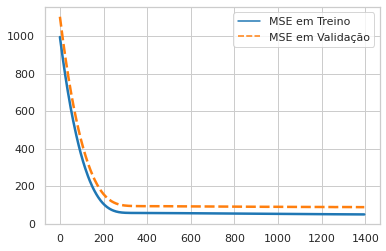

In [30]:
# Plot
sns.set(style = "whitegrid")
sns.lineplot(data = df, palette = "tab10", linewidth  = 2.5)

In [31]:
# Previsões com o modelo treinado
previsoes = modelo.predict(x_teste).flatten()

In [32]:
# Imprime as previsões
previsoes

array([21.380869 , 19.504606 , 23.655542 , 21.695894 , 21.130697 ,
       21.204823 , 24.118816 , 22.14527  , 21.50132  , 21.353071 ,
       25.142653 , 23.294188 , 21.663465 , 22.761425 , 23.164473 ,
       21.922897 , 26.027508 , 23.238598 , 27.922298 , 20.672056 ,
       21.028778 , 21.459623 , 20.116129 , 21.380869 , 19.940084 ,
       23.359049 , 22.87261  , 16.386772 , 18.601221 , 32.365097 ,
       21.830242 , 19.379522 , 20.70912  , 22.82165  , 29.539124 ,
       23.97057  , 22.071144 , 26.819706 , 25.068531 , 30.048725 ,
       26.49078  , 28.821049 , 29.946808 , 18.601221 , 23.020857 ,
       23.183004 , 19.47681  , 23.391478 , 33.88927  , 32.47165  ,
       19.323929 , 32.003742 , 29.1963   , 25.188982 , 23.460968 ,
       22.82165  , 25.351128 , 26.680721 , 24.280964 , 23.9891   ,
       23.104246 , 20.009577 , 23.284924 , 22.826283 , 21.533749 ,
       20.875898 , 21.635668 , 22.344477 , 21.950693 , 21.881203 ,
       26.069202 , 24.368986 , 13.8017025, 16.173666 , 18.5363

# Fim